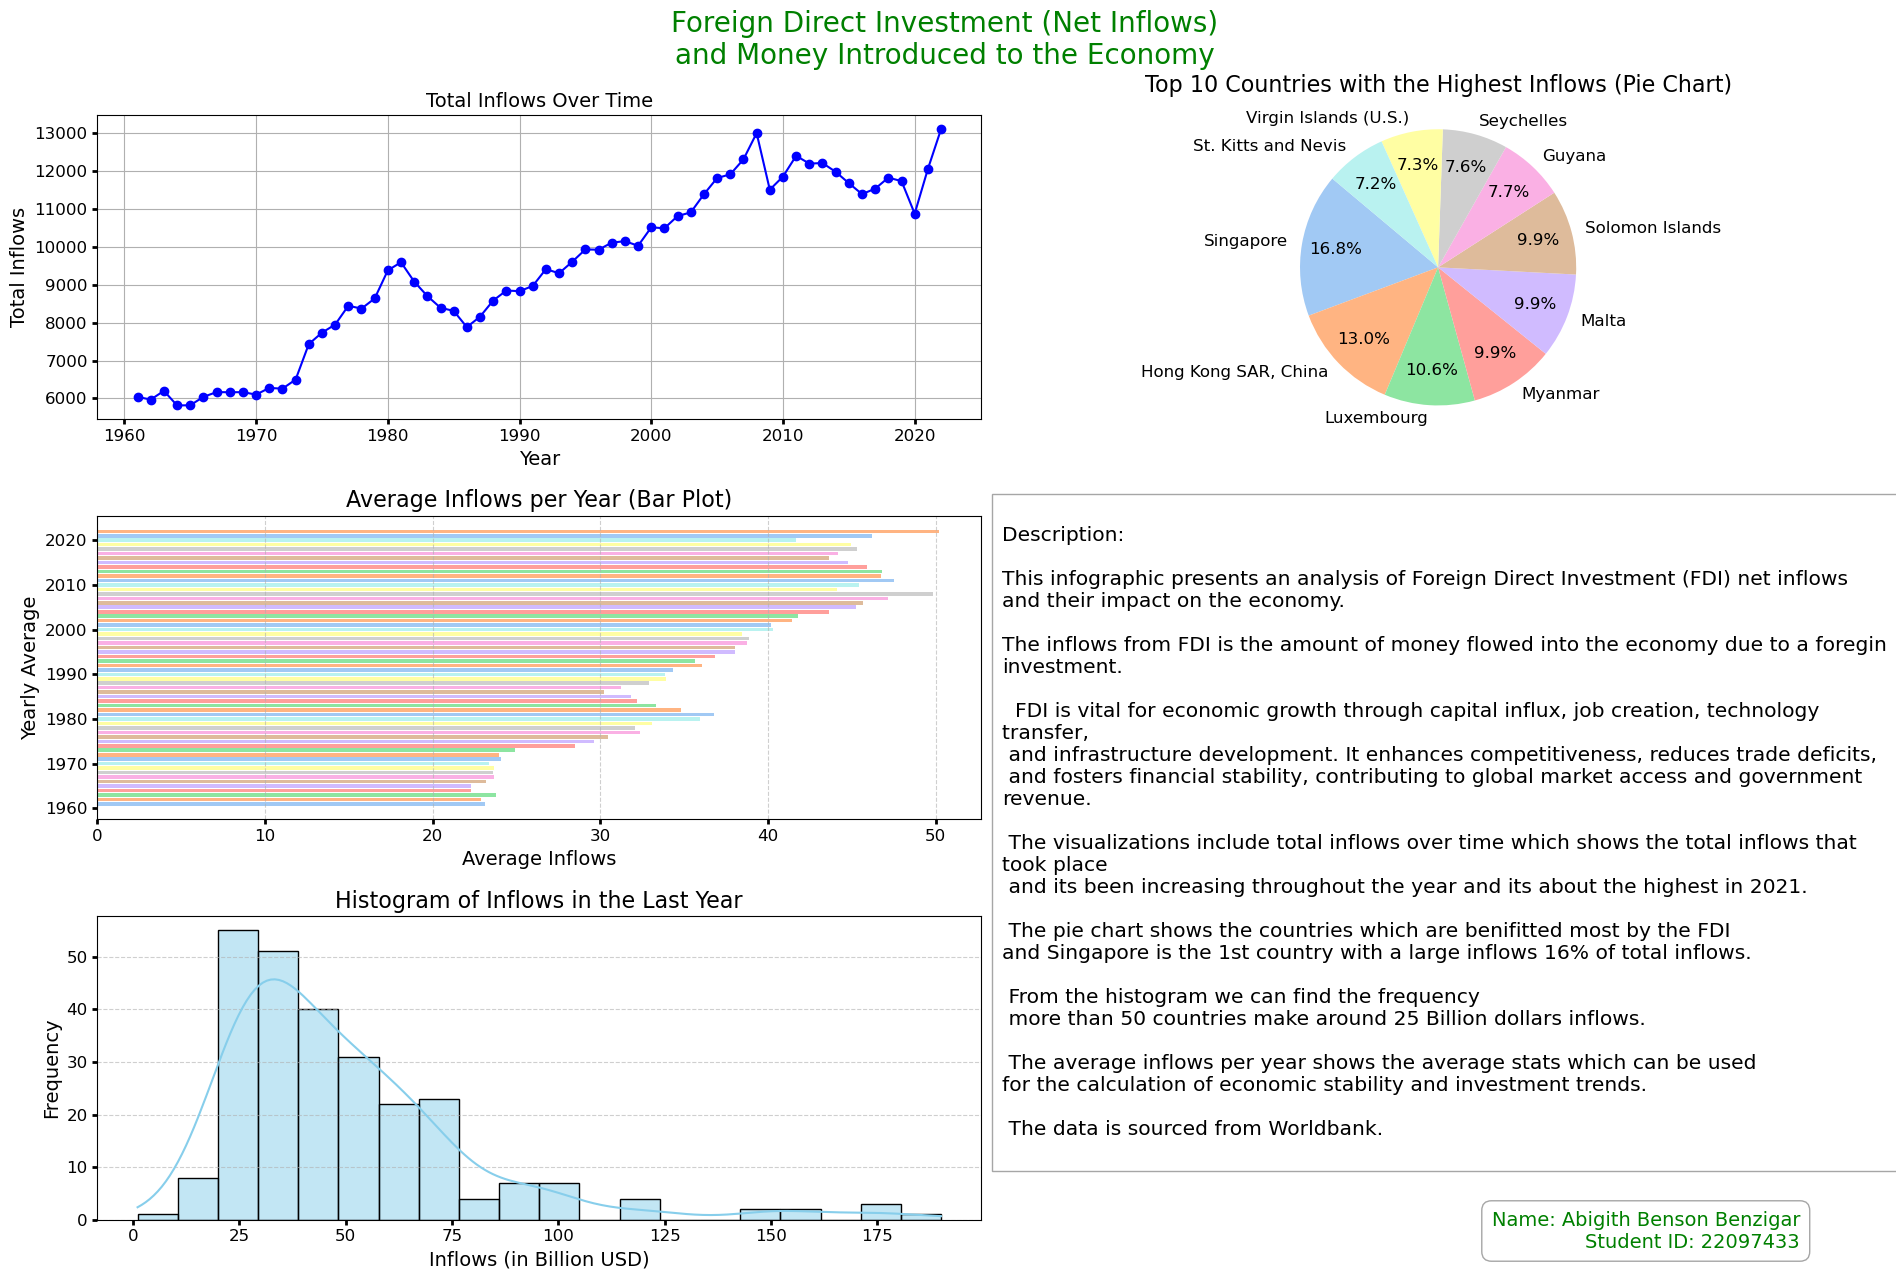

In [8]:
# Importing all the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec


def net_inflows():
    data = pd.read_csv("C:/Users/abigi/OneDrive/Desktop/Assignments/Data Handling and Visualsiation/Foregin_Direct_Investment_net inflows.csv", skiprows=4)
    data = data.loc[:, ~data.columns.isin(["Country Code", "Indicator Name", "Indicator Code"])]
    data = data.dropna(axis=1, how="all")
    data = data.iloc[5:].reset_index(drop=True)  # Adjusting the row index based on the neccesary data
    data = data.ffill()
    data = data.fillna(0)
    
    # Converting column labels to integers to avoid errors
    years = pd.to_numeric(data.columns[1:], errors='coerce')
    data.columns = ['Country Name'] + list(years)
   
    # Set 'Country Name' as the index
    data.set_index('Country Name', inplace=True)
   
    return data

data = net_inflows()

# Set up the grid for the infographic 
fig = plt.figure(figsize=(19, 13))
gs = GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

# Plot 1: Total net inflows Over Time
ax0 = fig.add_subplot(gs[0, 0])
total_inflows = pd.to_numeric(data.sum()[1:], errors='coerce')
ax0.plot(data.columns[1:], total_inflows, marker='o', color='b')
ax0.set_title("Total Inflows Over Time", fontsize=14)
ax0.set_xlabel("Year", fontsize=14)
ax0.set_ylabel("Total Inflows", fontsize=14)
ax0.grid(True)

# Increasing the size of x and y-axis values for better readability
ax0.tick_params(axis='both', which='both', labelsize=12, width=2)
ax0.xaxis.set_tick_params(labelsize=12)
ax0.yaxis.set_tick_params(labelsize=12)

# Plot 2: Top 10 Countries with the Highest Net inflows (Pie Chart)
ax1 = fig.add_subplot(gs[0, 1])
numeric_data = data.apply(pd.to_numeric, errors='coerce')
top_countries = numeric_data.sum(axis=1).sort_values(ascending=False).head(10)
labels = top_countries.index
sizes = top_countries.values
colors = sns.color_palette('pastel')[0:len(labels)]
# Adjusting the size of the pie chart
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, pctdistance=0.75, radius=0.9, textprops={'fontsize': 12})
ax1.set_title("Top 10 Countries with the Highest Inflows (Pie Chart)", y=1.05, fontsize=16)  # Adjusted the title position
ax1.axis('equal')


# Plot 3: Net inflows in the Last Year (Histogram)
ax3 = fig.add_subplot(gs[2, 0])
last_year_inflows = data.iloc[:, -1].copy()
last_year_inflows = pd.to_numeric(last_year_inflows, errors='coerce')
sns.histplot(last_year_inflows, bins=20, color='skyblue', kde=True, ax=ax3)
ax3.set_title("Histogram of Inflows in the Last Year", fontsize=16)
ax3.set_xlabel("Inflows (in Billion USD)", fontsize=14)
ax3.set_ylabel("Frequency", fontsize=14)
ax3.grid(axis='y', linestyle='--', alpha=0.6)

# Increase the thickness of x and y values for better visibility
ax3.tick_params(axis='both', which='both', labelsize=12, width=2)

# Plot 4: Average Net inflows per Year (Bar Plot)
ax2 = fig.add_subplot(gs[1, 0])
mean_inflows = pd.to_numeric(data.iloc[:, 1:].mean(), errors='coerce')
labels = mean_inflows.index
values = mean_inflows.values
colors = sns.color_palette('pastel')[0:len(labels)]
ax2.barh(labels, values, color=colors)  # Changed to a horizontal bar plot
ax2.set_title("Average Inflows per Year (Bar Plot)", fontsize=16)
ax2.set_xlabel("Average Inflows", fontsize=14)
ax2.set_ylabel("Yearly Average", fontsize=14)
ax2.tick_params(axis='both', which='both', labelsize=12, width=2)  # Adjust label size and thickness for better readability
ax2.grid(axis='x', linestyle='--', alpha=0.6)

# increase the overall size of the tick labels
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)

# Add a title to the whole infographic generated
fig.suptitle("Foreign Direct Investment (Net Inflows)\nand Money Introduced to the Economy", fontsize=20, color='green')

# Add's a text box with name and student ID to the bottom right
name_student_id = 'Name: Abigith Benson Benzigar\nStudent ID: 22097433'
textbox_props = dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7, pad=0.5)
fig.text(0.95, 0.025, name_student_id, ha='right', va='bottom', fontsize=14, color='green', bbox=textbox_props)


# Add a description in the remaining gap
description_text = """
Description: \n \nThis infographic presents an analysis of Foreign Direct Investment (FDI) net inflows 
and their impact on the economy.\n \nThe inflows from FDI is the amount of money flowed into the economy due to a foregin investment.
\n  FDI is vital for economic growth through capital influx, job creation, technology transfer, 
 and infrastructure development. It enhances competitiveness, reduces trade deficits, 
 and fosters financial stability, contributing to global market access and government revenue.
\n The visualizations include total inflows over time which shows the total inflows that took place
 and its been increasing throughout the year and its about the highest in 2021. 
\n The pie chart shows the countries which are benifitted most by the FDI 
and Singapore is the 1st country with a large inflows 16% of total inflows.
\n From the histogram we can find the frequency \n more than 50 countries make around 25 Billion dollars inflows.
\n The average inflows per year shows the average stats which can be used 
for the calculation of economic stability and investment trends.
\n The data is sourced from Worldbank.
"""
description_box = fig.text(0.53, 0.60, description_text, ha='left', va='top', fontsize=14.60, color='black', 
                          bbox=dict(boxstyle='square', facecolor='white', edgecolor='grey', alpha=0.7, pad=0.50),
                          transform=fig.transFigure, wrap=True, linespacing=1.20)

# Save the infographic
fig.tight_layout(h_pad=1.5)  # Increase hspace between rows
plt.show()
